In [23]:
import pandas as pd
import seaborn as sn

In [24]:
df = pd.read_csv('../../text-analysis-simplification.csv')

In [34]:
mean_columns = ['sentence_length','Kincaid', 'ARI',	'Coleman-Liau',	'FleschReadingEase', 'GunningFogIndex', 'LIX',	'DaleChallIndex']
sum_columns = ['tobeverb',	'auxverb',	'conjunction',	'pronoun',	'preposition',	'nominalization',	'interrogative',	'article',	'subordination']

In [25]:
df.head()

,sentence,source,title,sentence_length,Kincaid,ARI,Coleman-Liau,FleschReadingEase,GunningFogIndex,LIX,...,DaleChallIndex,tobeverb,auxverb,conjunction,pronoun,preposition,nominalization,interrogative,article,subordination
0,Controle op gebruik algoritmische surveillance...,AbstractiveSummEP,AISurveillance,8,12.425714,16.385714,22.811356,18.444286,14.228571,64.142857,...,19.773700,0,0,0,0,0,0,0,0,0
1,Exploratie door lens relationele ethiek.,AbstractiveSummEP,AISurveillance,6,12.320000,14.040000,19.440697,15.640000,10.000000,45.000000,...,16.516500,0,0,0,0,0,1,0,0,0
2,Technologische ontwikkelingen sinds einde 20st...,AbstractiveSummEP,AISurveillance,15,19.370000,19.549286,24.504744,-18.875000,17.028571,49.714286,...,20.120900,0,0,0,0,0,0,0,0,0
3,Big data en AI in 21ste eeuw interessant voor ...,AbstractiveSummEP,AISurveillance,11,6.010000,4.294000,7.111812,69.785000,12.000000,30.000000,...,16.764500,0,0,0,0,0,1,0,0,0
4,Gebruik technologie door politie als algoritmi...,AbstractiveSummEP,AISurveillance,8,17.482857,20.422857,27.851228,-17.812857,25.657143,78.428571,...,17.517986,0,0,0,0,0,1,0,0,0


In [ ]:
grouped = df.groupby(['source'])

In [43]:
df.groupby(['source'])\
    .mean()

,sentence_length,Kincaid,ARI,Coleman-Liau,FleschReadingEase,GunningFogIndex,LIX,SMOGIndex,RIX,DaleChallIndex,tobeverb,auxverb,conjunction,pronoun,preposition,nominalization,interrogative,article,subordination,aantal
source,,,,,,,,,,,,,,,,,,,,
AbstractiveSumm,16.156909,12.214489,14.143684,16.954365,33.024945,15.766468,51.026363,12.568224,5.107728,18.875007,0.309133,0.559719,0.008197,0.086651,0.117096,0.530445,0.019906,0.183841,0.051522,2652.0
AbstractiveSummEP,17.859670,12.489181,14.508652,16.724177,33.909959,16.189803,51.395572,13.108607,5.553066,18.948026,0.341981,0.584906,0.005896,0.082547,0.133255,0.558962,0.015330,0.194575,0.053066,2652.0
ChatGPT,24.391892,14.843680,17.410334,18.013121,25.899709,19.148322,57.607169,15.502751,7.648649,19.404928,0.418919,1.175676,0.000000,0.108108,0.189189,0.675676,0.000000,0.270270,0.054054,2652.0
ExtractiveSum,27.590062,14.958702,18.064627,17.036134,30.407899,19.411738,59.993841,15.587931,8.322981,17.962782,0.453416,0.776398,0.000000,0.118012,0.198758,0.763975,0.024845,0.236025,0.043478,2652.0
GPT3Custom,21.882353,14.118087,16.374829,17.877664,26.461727,17.669313,55.918783,14.407876,7.039216,19.214089,0.450980,0.803922,0.000000,0.078431,0.196078,0.607843,0.000000,0.098039,0.137255,2652.0
GPT3CustomLS,20.593750,13.735074,15.293363,17.023967,27.313137,16.090558,52.621290,13.109405,6.093750,18.897636,0.593750,0.937500,0.031250,0.062500,0.156250,0.656250,0.000000,0.062500,0.187500,2652.0
HybridSum,16.139394,13.185045,15.259596,18.405982,26.223600,16.397969,53.424869,13.121571,5.424242,18.839952,0.351515,0.612121,0.000000,0.060606,0.139394,0.587879,0.018182,0.175758,0.048485,2652.0
HybridSumEP,18.679245,12.894668,14.956050,16.967600,32.733518,17.034435,52.747106,13.911769,5.924528,18.873224,0.367925,0.669811,0.004717,0.061321,0.146226,0.575472,0.023585,0.193396,0.047170,2652.0
Original,23.834586,13.651549,16.132239,16.510241,33.305491,17.664600,55.444667,14.306922,6.902256,17.022710,0.428571,0.548872,0.000000,0.105263,0.142857,0.789474,0.000000,0.278195,0.090226,2652.0


In [44]:
df.groupby(['source'])\
    .sum()

,sentence_length,Kincaid,ARI,Coleman-Liau,FleschReadingEase,GunningFogIndex,LIX,SMOGIndex,RIX,DaleChallIndex,tobeverb,auxverb,conjunction,pronoun,preposition,nominalization,interrogative,article,subordination,aantal
source,,,,,,,,,,,,,,,,,,,,
AbstractiveSumm,13798,10431.173310,12078.705823,14479.027857,28203.302964,13464.563578,43576.513956,10733.263140,4362.0,16119.255642,264,478,7,74,100,453,17,157,44,2264808
AbstractiveSummEP,15145,10590.825379,12303.336882,14182.102298,28755.645503,13728.953173,43583.445030,11116.098468,4709.0,16067.926293,290,496,5,70,113,474,13,165,45,2248896
ChatGPT,1805,1098.432341,1288.364721,1332.970944,1916.578469,1416.975837,4262.930502,1147.203553,566.0,1435.964680,31,87,0,8,14,50,0,20,4,196248
ExtractiveSum,4442,2408.351094,2908.405019,2742.817597,4895.671735,3125.289758,9659.008342,2509.656874,1340.0,2892.007902,73,125,0,19,32,123,4,38,7,426972
GPT3Custom,1116,720.022456,835.116284,911.760846,1349.548068,901.134944,2851.857938,734.801685,359.0,979.918561,23,41,0,4,10,31,0,5,7,135252
GPT3CustomLS,659,439.522358,489.387631,544.766940,874.020381,514.897867,1683.881277,419.500958,195.0,604.724357,19,30,1,2,5,21,0,2,6,84864
HybridSum,2663,2175.532448,2517.833297,3036.987030,4326.894060,2705.664954,8815.103430,2165.059166,895.0,3108.592115,58,101,0,10,23,97,3,29,8,437580
HybridSumEP,3960,2733.669551,3170.682675,3597.131187,6939.505843,3611.300145,11182.386567,2949.295026,1256.0,4001.123427,78,142,1,13,31,122,5,41,10,562224
Original,3170,1815.656007,2145.587813,2195.862057,4429.630323,2349.391812,7374.140733,1902.820631,918.0,2264.020482,57,73,0,14,19,105,0,37,12,352716


* Kincaid: This metric measures the US grade level required to understand the text.
* ARI: This metric also measures the US grade level required to understand the text.
* Coleman-Liau: This metric measures the US grade level required to understand the text.
* Flesch Reading Ease: This metric measures how easy or difficult a text is to read. The higher the score, the easier it is to read.
* Gunning Fog Index: This metric measures the years of formal education required to understand the text.
* LIX: This metric measures the complexity of a text by dividing the number of words by the number of sentences and adding the number of long words (more than six letters) per 100 words.
* SMOG Index: This metric measures the years of education required to understand the text.
* RIX: This metric measures how complex a text is by dividing long sentences (more than 10 words) by short sentences (less than 10 words).
* Dale-Chall Index: This metric measures how easy or difficult a text is to read. The higher the score, the more difficult it is to read.

In [27]:
df.groupby(['title']).mean()

,sentence_length,Kincaid,ARI,Coleman-Liau,FleschReadingEase,GunningFogIndex,LIX,SMOGIndex,RIX,DaleChallIndex,tobeverb,auxverb,conjunction,pronoun,preposition,nominalization,interrogative,article,subordination
title,,,,,,,,,,,,,,,,,,,
AISurveillance,20.324597,14.117314,16.631610,18.194719,26.084453,17.458188,55.392121,14.040032,6.647177,19.034196,0.336694,0.824597,0.002016,0.074597,0.102823,0.604839,0.022177,0.215726,0.044355
BelgieVsNederland,16.865031,12.453262,14.684104,17.485585,31.617790,15.639192,51.096720,12.370965,5.081800,18.807813,0.282209,0.292434,0.006135,0.044990,0.139059,0.464213,0.006135,0.188139,0.006135
Pensioenhervorming,17.595912,12.821253,14.779408,17.233128,30.946672,16.758375,52.186352,13.368121,5.548742,19.087558,0.242138,0.411950,0.000000,0.124214,0.127358,0.616352,0.006289,0.240566,0.047170
TheImpactofAIOnJobsAndSexualDiscrimination,21.741053,14.301106,16.125715,17.229404,26.683124,17.604144,55.605841,14.350752,6.911579,17.984009,0.646316,0.976842,0.016842,0.105263,0.105263,0.741053,0.008421,0.174737,0.155789
VirtualRealityStotterTherapie,17.035971,10.708384,12.828938,15.001918,45.098383,15.426166,49.696617,12.631691,5.075540,18.784585,0.330935,0.672662,0.003597,0.062950,0.188849,0.492806,0.039568,0.172662,0.037770


Hypothese 1:

de leesgraad van automatisch vereenvoudigde wetenschappelijke artikelen hebben een significant eenvoudigere leesgraad vergeleken met de oorspronkelijke wetenschappelijke artikelen

Hypothese 2:

de leesgraad van automatisch vereenvoudigde wetenschappelijke artikelen zijn minstens even eenvoudig dan handmatig vereenvoudigde artikelen

Hypothese 3:

de gebruikte syntactische structuren in een automatisch vereenvoudigd wetenschappelijk artikel zijn minstens even eenvoudig als het aantal in een handmatig vereenvoudigd wetenschappelijk artikel

Hypothese 4:

iets met samenvatting

Hypothese 5:

iets met het prototype

<AxesSubplot:xlabel='sentence_length', ylabel='Count'>

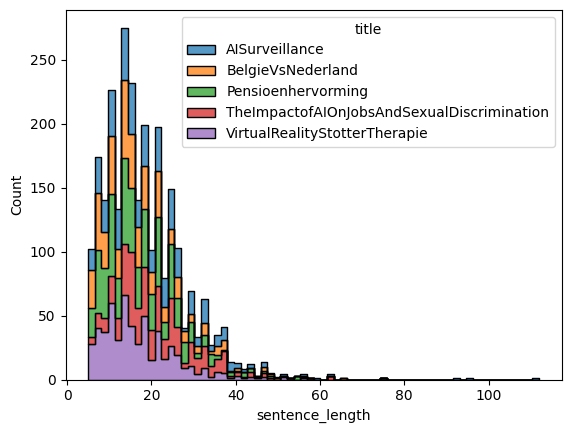

In [28]:
sn.histplot(data=df, x='sentence_length', hue='title', multiple="stack", element="step")

<AxesSubplot:xlabel='sentence_length', ylabel='Count'>

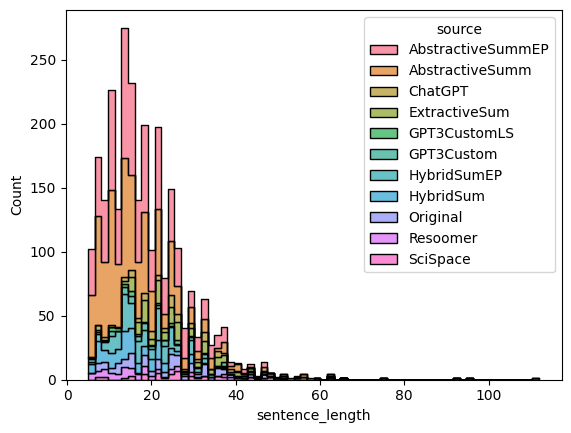

In [29]:
sn.histplot(data=df, x='sentence_length', hue='source', multiple="stack", element="step")

<AxesSubplot: xlabel='FleschReadingEase', ylabel='sentence_length'>

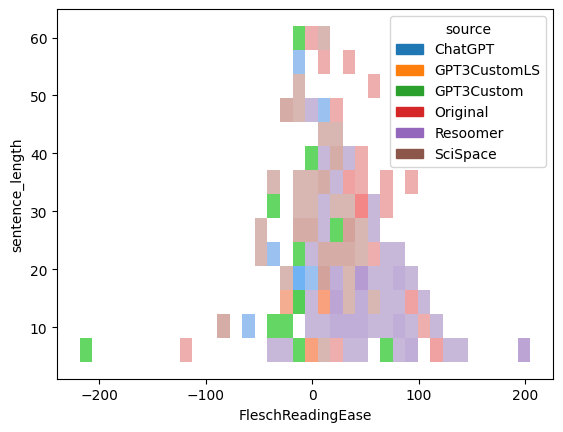

In [44]:
sn.histplot(data=df, x='FleschReadingEase', y='sentence_length', hue='source')